<a href="https://colab.research.google.com/github/robertworkbuckley/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/Sprint_4_Buildweek_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np



# Import and Aggregate

In [0]:
df = pd.read_csv('ARMER2017.csv')

In [3]:
df.head()

,rds_key,license_name,street,city,st,rifle_mfg,exp_misc,exp_pistols,exp_revolvers,rifle_exp,shotgun_exp,misc_fa_mfg,pistol22,pistol25,pistol32,pistol380,pistol9mm,pistol50,pistol_total,rvlr22,rvlr32,rvlr357,rvlr38,rvlr44,rvlr50,rvlrtotl,shotgun_mfg,Export_Total,Manufactured_Total
0,1602475,REMINGTON ARMS COMPANY LLC,14 HOEFLER AVE,ILION,NY,NaN,NaN,NaN,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26,0
1,1603815,ARMORERS BENCH LLC,34 PINE ST,LACKAWANNA,NY,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
2,2300479,PNEU DART INC,15223 STATE ROUTE 87,WILLIAMSPORT,PA,NaN,NaN,NaN,NaN,167.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,167,0
3,2304234,LANCER SYSTEMS LP,2800 MILFORD SQUARE PKE,QUAKERTOWN,PA,NaN,NaN,NaN,NaN,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53,0
4,2304810,SARCO INC,50 HILTON ST,EASTON,PA,NaN,NaN,NaN,NaN,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50,0


In [4]:
df.shape

(2162, 29)

In [5]:
df.describe()

,rds_key,rifle_mfg,exp_misc,exp_pistols,exp_revolvers,rifle_exp,shotgun_exp,misc_fa_mfg,pistol22,pistol25,pistol32,pistol380,pistol9mm,pistol50,pistol_total,rvlr22,rvlr32,rvlr357,rvlr38,rvlr44,rvlr50,rvlrtotl,shotgun_mfg,Export_Total,Manufactured_Total
count,2.162000e+03,1702.000000,16.000000,47.000000,11.000000,112.000000,12.000000,503.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,7.700000e+02,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,118.000000,2162.000000,2.162000e+03
mean,5.523081e+07,1471.264395,145.750000,5860.085106,1970.545455,1418.491071,2499.750000,1508.218688,530.785714,14.461039,10.587013,1101.850649,2281.322078,854.507792,4.793519e+03,3757.223529,20.176471,1577.094118,2093.600000,494.847059,538.435294,8481.376471,5535.076271,225.855689,3.851893e+03
std,3.009612e+07,18494.635597,279.946066,26689.919028,4871.309708,6671.525110,5798.442316,12594.802101,5882.256881,157.727924,79.502784,12299.279024,27322.315147,10351.121372,4.918271e+04,25082.151799,120.381257,8615.029621,13106.589693,3055.828687,3274.285838,37846.124368,37134.958486,4588.210269,4.687260e+04
min,1.602475e+06,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000e+00
25%,3.360507e+07,2.000000,8.750000,10.000000,9.500000,5.750000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,3.000000e+00
50%,5.730527e+07,6.000000,25.500000,111.000000,122.000000,21.000000,3.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,0.000000,8.000000e+00
75%,8.250660e+07,20.000000,112.750000,421.500000,519.500000,182.250000,552.250000,95.000000,1.000000,0.000000,0.000000,0.000000,3.000000,2.000000,2.000000e+01,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,17.000000,20.500000,0.000000,3.575000e+01
max,9.990029e+07,443436.000000,1071.000000,177366.000000,16230.000000,62319.000000,18238.000000,211382.000000,120033.000000,3888.000000,1326.000000,281955.000000,606732.000000,250394.000000,1.032450e+06,225151.000000,944.000000,64077.000000,116823.000000,23349.000000,24202.000000,226065.000000,302830.000000,179124.000000,1.506256e+06


In [6]:
df.isnull().sum()

rds_key                  0
license_name             0
street                   0
city                     0
st                       0
rifle_mfg              460
exp_misc              2146
exp_pistols           2115
exp_revolvers         2151
rifle_exp             2050
shotgun_exp           2150
misc_fa_mfg           1659
pistol22              1392
pistol25              1392
pistol32              1392
pistol380             1392
pistol9mm             1392
pistol50              1392
pistol_total          1392
rvlr22                2077
rvlr32                2077
rvlr357               2077
rvlr38                2077
rvlr44                2077
rvlr50                2077
rvlrtotl              2077
shotgun_mfg           2044
Export_Total             0
Manufactured_Total       0
dtype: int64

In [0]:
df = df.replace(np.NaN, 0)

In [8]:
df.isnull().sum()

rds_key               0
license_name          0
street                0
city                  0
st                    0
rifle_mfg             0
exp_misc              0
exp_pistols           0
exp_revolvers         0
rifle_exp             0
shotgun_exp           0
misc_fa_mfg           0
pistol22              0
pistol25              0
pistol32              0
pistol380             0
pistol9mm             0
pistol50              0
pistol_total          0
rvlr22                0
rvlr32                0
rvlr357               0
rvlr38                0
rvlr44                0
rvlr50                0
rvlrtotl              0
shotgun_mfg           0
Export_Total          0
Manufactured_Total    0
dtype: int64

In [0]:
#aggregating all multiple locations each company has.
#this will show the company name once with the combined totals of all their
#locations.
aggregation_functions = {'rifle_mfg': 'sum', 'exp_misc': 'sum', 
                          'exp_pistols': 'sum', 'exp_revolvers': 'sum',
                          'rifle_exp': 'sum', 'shotgun_exp': 'sum', 
                         'misc_fa_mfg': 'sum', 'pistol22': 'sum',
                         'pistol25': 'sum', 'pistol32': 'sum', 
                          'pistol380': 'sum', 'pistol9mm': 'sum', 
                         'pistol50': 'sum', 'pistol_total': 'sum', 
                          'rvlr22': 'sum', 'rvlr32': 'sum', 
                         'rvlr357': 'sum', 'rvlr38': 'sum', 'rvlr44': 'sum',
                          'rvlr50': 'sum', 'rvlrtotl': 'sum',
                         'shotgun_mfg': 'sum', 'Export_Total': 'sum',
                          'Manufactured_Total': 'sum'}

df_aggregated = df.groupby(df['license_name'], as_index=False).aggregate(aggregation_functions)

In [11]:
df_aggregated.head()

,license_name,rifle_mfg,exp_misc,exp_pistols,exp_revolvers,rifle_exp,shotgun_exp,misc_fa_mfg,pistol22,pistol25,pistol32,pistol380,pistol9mm,pistol50,pistol_total,rvlr22,rvlr32,rvlr357,rvlr38,rvlr44,rvlr50,rvlrtotl,shotgun_mfg,Export_Total,Manufactured_Total
0,144 TACTICAL LLC,406.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,406
1,170 TACTICAL INC,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3
2,1776 ENTERPRISES LLC,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,6
3,20-X INDUSTRIES LLC,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
4,2131 ARMS LLC,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,7


In [12]:
#There are now no multiple entries
df_aggregated['license_name'].value_counts()

SMR MANUFACTURING LLC                  1
S T A R T LLC                          1
JASON TERRY CLARK LLC                  1
ENCORE FURNITURE THRIFTS & MORE LLC    1
REVOLUTION FIREARMS LLC                1
                                      ..
SLITHER MISSION LLC                    1
HUNSON INDUSTRIES LLC                  1
GORMAN, SCOTT MATTHEW                  1
TJ GUNS LTD                            1
2ND AMENDMENT ENTERPRISES LLC          1
Name: license_name, Length: 2101, dtype: int64

In [0]:
import matplotlib.pyplot as plt

In [14]:
list(df.columns)

['rds_key',
 'license_name',
 'street',
 'city',
 'st',
 'rifle_mfg',
 'exp_misc',
 'exp_pistols',
 'exp_revolvers',
 'rifle_exp',
 'shotgun_exp',
 'misc_fa_mfg',
 'pistol22',
 'pistol25',
 'pistol32',
 'pistol380',
 'pistol9mm',
 'pistol50',
 'pistol_total',
 'rvlr22',
 'rvlr32',
 'rvlr357',
 'rvlr38',
 'rvlr44',
 'rvlr50',
 'rvlrtotl',
 'shotgun_mfg',
 'Export_Total',
 'Manufactured_Total']

# Exploring amounts of each gun type

In [15]:
df_aggregated['rifle_mfg'].sum()

2504092.0

In [16]:
df_aggregated['misc_fa_mfg'].sum()

758634.0

In [17]:
df_aggregated['pistol_total'].sum()

3691010.0

In [18]:
df_aggregated['shotgun_mfg'].sum()

653139.0

In [19]:
df_aggregated['rvlrtotl'].sum()

720917.0

In [20]:
Number_manufactured_2017 =df_aggregated['Manufactured_Total'].sum()
Number_manufactured_2017

8327792

In [21]:
((df_aggregated['rifle_mfg'].sum()) + (df_aggregated['misc_fa_mfg'].sum()) + 
(df_aggregated['pistol_total'].sum()) + (df_aggregated['shotgun_mfg'].sum()) +
(df_aggregated['rvlrtotl'].sum()))

8327792.0

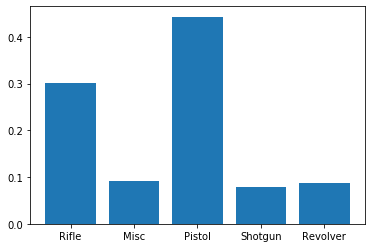

In [22]:
bars = ('Rifle', 'Misc', 'Pistol', 'Shotgun', 'Revolver')
height = [(df_aggregated['rifle_mfg'].sum() / df_aggregated['Manufactured_Total'].sum()), 
               (df_aggregated['misc_fa_mfg'].sum() / df_aggregated['Manufactured_Total'].sum()),
               (df_aggregated['pistol_total'].sum() /df_aggregated['Manufactured_Total'].sum()),
                (df_aggregated['shotgun_mfg'].sum() / df_aggregated['Manufactured_Total'].sum()),
                (df_aggregated['rvlrtotl'].sum() /df_aggregated['Manufactured_Total'].sum())]
plt.bar(bars, height);

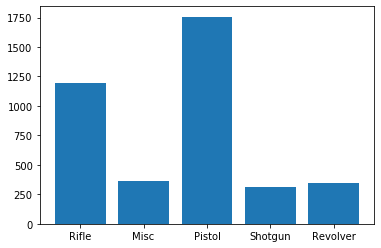

In [23]:
bars_mean = ('Rifle', 'Misc', 'Pistol', 'Shotgun', 'Revolver')
height_mean = [df_aggregated['rifle_mfg'].mean(), df_aggregated['misc_fa_mfg'].mean(),
               df_aggregated['pistol_total'].mean(), df_aggregated['shotgun_mfg'].mean(),
               df_aggregated['rvlrtotl'].mean()]
plt.bar(bars_mean, height_mean);

In [24]:
totals = df_aggregated[['license_name', 'rifle_mfg', 'misc_fa_mfg', 'pistol_total', 'shotgun_mfg', 'rvlrtotl', 'Manufactured_Total']]
totals.describe()

,rifle_mfg,misc_fa_mfg,pistol_total,shotgun_mfg,rvlrtotl,Manufactured_Total
count,2101.000000,2101.000000,2.101000e+03,2101.000000,2101.000000,2.101000e+03
mean,1191.857211,361.082342,1.756787e+03,310.870538,343.130414,3.963728e+03
std,16736.680592,6266.999891,2.992616e+04,8876.379280,7770.867180,5.109961e+04
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,1.000000,0.000000,0.000000e+00,0.000000,0.000000,3.000000e+00
50%,4.000000,0.000000,0.000000e+00,0.000000,0.000000,8.000000e+00
75%,14.000000,0.000000,2.000000e+00,0.000000,0.000000,3.600000e+01
max,448513.000000,211382.000000,1.032450e+06,302830.000000,226065.000000,1.506256e+06


In [0]:
pistols = df_aggregated[['pistol22', 'pistol25', 'pistol32', 'pistol380', 'pistol9mm', 'pistol50', 'pistol_total']]

In [26]:
pistols.describe()

,pistol22,pistol25,pistol32,pistol380,pistol9mm,pistol50,pistol_total
count,2101.000000,2101.000000,2101.000000,2101.00000,2101.000000,2101.000000,2.101000e+03
mean,194.528796,5.299857,3.880057,403.81961,836.086625,313.170395,1.756787e+03
std,3685.049298,95.703986,48.380475,7461.91125,16572.133938,6277.932120,2.992616e+04
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000e+00
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000e+00
50%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000e+00
75%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.000000e+00
max,127410.000000,3888.000000,1326.000000,281961.00000,606732.000000,250394.000000,1.032450e+06


In [27]:
revolver = df_aggregated[['rvlr22', 'rvlr32', 'rvlr357', 'rvlr38', 'rvlr44', 'rvlr50', 'rvlrtotl']]
revolver.describe()

,rvlr22,rvlr32,rvlr357,rvlr38,rvlr44,rvlr50,rvlrtotl
count,2101.000000,2101.000000,2101.000000,2101.000000,2101.000000,2101.000000,2101.000000
mean,152.005712,0.816278,63.804379,84.700619,20.019990,21.783436,343.130414
std,5072.767735,24.823617,1761.830677,2654.415937,623.106566,665.702162,7770.867180
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,225151.000000,967.000000,64711.000000,116823.000000,23584.000000,24202.000000,226065.000000


In [28]:
revolver.iloc[revolver.idxmax(axis=0)]

,rvlr22,rvlr32,rvlr357,rvlr38,rvlr44,rvlr50,rvlrtotl
873,225151.0,0.0,470.0,0.0,0.0,444.0,226065.0
1779,34483.0,967.0,64711.0,29817.0,23584.0,18540.0,172102.0
1779,34483.0,967.0,64711.0,29817.0,23584.0,18540.0,172102.0
1693,7123.0,0.0,43263.0,116823.0,15973.0,24202.0,207384.0
1779,34483.0,967.0,64711.0,29817.0,23584.0,18540.0,172102.0
1693,7123.0,0.0,43263.0,116823.0,15973.0,24202.0,207384.0
873,225151.0,0.0,470.0,0.0,0.0,444.0,226065.0


In [29]:
df_aggregated.iloc[[873], [0,15,-1]]

,license_name,rvlr22,Manufactured_Total
873,HERITAGE MANUFACTURING INC,225151.0,226065


In [30]:
df_aggregated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2101 entries, 0 to 2100
Data columns (total 25 columns):
license_name          2101 non-null object
rifle_mfg             2101 non-null float64
exp_misc              2101 non-null float64
exp_pistols           2101 non-null float64
exp_revolvers         2101 non-null float64
rifle_exp             2101 non-null float64
shotgun_exp           2101 non-null float64
misc_fa_mfg           2101 non-null float64
pistol22              2101 non-null float64
pistol25              2101 non-null float64
pistol32              2101 non-null float64
pistol380             2101 non-null float64
pistol9mm             2101 non-null float64
pistol50              2101 non-null float64
pistol_total          2101 non-null float64
rvlr22                2101 non-null float64
rvlr32                2101 non-null float64
rvlr357               2101 non-null float64
rvlr38                2101 non-null float64
rvlr44                2101 non-null float64
rvlr50        

In [31]:
df_aggregated.iloc[[1779,], [0, 17, 19, -1]]

,license_name,rvlr357,rvlr44,Manufactured_Total
1779,"STURM, RUGER & COMPANY, INC",64711.0,23584.0,1198061


In [32]:
df_aggregated.iloc[[1693], [0,20, -1]]

,license_name,rvlr50,Manufactured_Total
1693,SMITH & WESSON CORP,24202.0,1506256


In [33]:
df_aggregated.iloc[[1545,2065,1693,1203,873,1693], [0,1,7,14,21,22,-1]]

,license_name,rifle_mfg,misc_fa_mfg,pistol_total,rvlrtotl,shotgun_mfg,Manufactured_Total
1545,REMINGTON ARMS COMPANY LLC,448513.0,33936.0,59581.0,0.0,269391.0,811421
2065,WM C ANDERSON INC,2295.0,211382.0,1448.0,0.0,0.0,215125
1693,SMITH & WESSON CORP,265356.0,1045.0,1032450.0,207384.0,21.0,1506256
1203,"MAVERICK ARMS, INC",80275.0,115995.0,0.0,0.0,302830.0,499100
873,HERITAGE MANUFACTURING INC,0.0,0.0,0.0,226065.0,0.0,226065
1693,SMITH & WESSON CORP,265356.0,1045.0,1032450.0,207384.0,21.0,1506256


# Eploring Totals/ top-5

In [0]:
top_mfg_5 = totals.nlargest(5, 'Manufactured_Total')

In [35]:
top_mfg_5.head()

,license_name,rifle_mfg,misc_fa_mfg,pistol_total,shotgun_mfg,rvlrtotl,Manufactured_Total
1693,SMITH & WESSON CORP,265356.0,1045.0,1032450.0,21.0,207384.0,1506256
1779,"STURM, RUGER & COMPANY, INC",407837.0,2.0,618104.0,16.0,172102.0,1198061
1545,REMINGTON ARMS COMPANY LLC,448513.0,33936.0,59581.0,269391.0,0.0,811421
1677,SIG SAUER INC,35920.0,0.0,536774.0,0.0,0.0,572694
1203,"MAVERICK ARMS, INC",80275.0,115995.0,0.0,302830.0,0.0,499100


In [0]:
top_mfg_10 = totals.nlargest(10, 'Manufactured_Total')

In [37]:
top_mfg_10

,license_name,rifle_mfg,misc_fa_mfg,pistol_total,shotgun_mfg,rvlrtotl,Manufactured_Total
1693,SMITH & WESSON CORP,265356.0,1045.0,1032450.0,21.0,207384.0,1506256
1779,"STURM, RUGER & COMPANY, INC",407837.0,2.0,618104.0,16.0,172102.0,1198061
1545,REMINGTON ARMS COMPANY LLC,448513.0,33936.0,59581.0,269391.0,0.0,811421
1677,SIG SAUER INC,35920.0,0.0,536774.0,0.0,0.0,572694
1203,"MAVERICK ARMS, INC",80275.0,115995.0,0.0,302830.0,0.0,499100
1778,STURM RUGER & COMPANY INC,253318.0,16654.0,163519.0,0.0,2.0,433493
868,HENRY RAC HOLDING CORP,235037.0,0.0,0.0,0.0,0.0,235037
873,HERITAGE MANUFACTURING INC,0.0,0.0,0.0,0.0,226065.0,226065
1051,KIMBER MFG INC,11378.0,0.0,183858.0,0.0,21349.0,216585
2065,WM C ANDERSON INC,2295.0,211382.0,1448.0,0.0,0.0,215125


# Plotting Top of each gun

In [0]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# sns.set(style='whitegrid')
# f, ax = plt.subplots(figsize=(6, 10))


# sns.barplot('Manufactured_Total', y='license_name', data=top_mfg, color='b')

# sns.barplot('rifle_mfg', y='license_name', data=top_mfg, color='g')

# sns.barplot('pistol_total', y='license_name', data=top_mfg, color='r')

# sns.barplot('shotgun_mfg', y='license_name', data=top_mfg, color='y')

# sns.barplot('rvlrtotl', y='license_name', data=top_mfg, color='purple')

# sns.barplot('misc_fa_mfg', y='license_name', data=top_mfg, color='black');

In [0]:
# sns.set(style='whitegrid')
# #f, ax = plt.subplots(figsize=(6, 10))


# sns.barplot('Manufactured_Total', y='license_name', data=top_mfg, color='b')

# sns.barplot('pistol_total', y='license_name', data=top_mfg, color='g')

# sns.barplot('shotgun_mfg', y='license_name', data=top_mfg, color='r')

# sns.barplot('rifle_mfg', y='license_name', data=top_mfg, color='y')

# sns.barplot('rvlrtotl', y='license_name', data=top_mfg, color='purple')

# sns.barplot('misc_fa_mfg', y='license_name', data=top_mfg, color='black');

In [0]:
#https://python-graph-gallery.com/11-grouped-barplot/

# barWidth = .25

# bars1 = top_mfg['rifle_mfg']
# bars2 = top_five['misc_fa_mfg']
# bars3 = top_five['pistol_total']
# bars4 = top_five['shotgun_mfg']
# bars5 = top_five['rvlrtotl']
# bars6 = top_five['Manufactured_Total']

# r1 = np.arange(len(bars1))
# r2 = [x + barWidth for x in r1]
# r3 = [x + barWidth for x in r2]
# r4 = [x + barWidth for x in r3]
# r5 = [x + barWidth for x in r4]

# plt.bar(r1, bars1, width=barWidth, color='black', edgecolor='white', label='var1')
# plt.bar(r2, bars2, width=barWidth, color='blue', edgecolor='white', label='var2')
# plt.bar(r3, bars3, width=barWidth, color='green', edgecolor='white', label='var3')
# plt.bar(r4, bars4, width=barWidth, color='yellow', edgecolor='white', label='var4')
# plt.bar(r5, bars5, width=barWidth, color='red', edgecolor='white', label='var5')
# plt.bar(r5, bars6, width=barWidth, color='orange', edgecolor='white', label='var6')

# plt.xticks([r + barWidth for r in range(len(bars1))], ['SW', 'Rem', 'Rug', 'D', 'E'])

# plt.show()


# Top-5-Overall, plotting

In [0]:
# top_mfg.head()

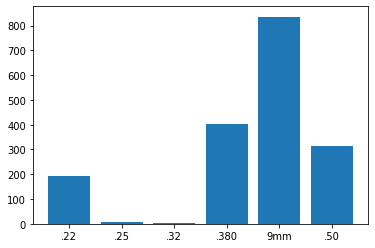

In [41]:
bars_pistol = ('.22', '.25', '.32', '.380', '9mm', '.50')
height_pistol = [df_aggregated['pistol22'].mean(), df_aggregated['pistol25'].mean(),
                 df_aggregated['pistol32'].mean(), df_aggregated['pistol380'].mean(),
                 df_aggregated['pistol9mm'].mean(), df_aggregated['pistol50'].mean()]
plt.bar(bars_pistol, height_pistol);

In [42]:
df_aggregated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2101 entries, 0 to 2100
Data columns (total 25 columns):
license_name          2101 non-null object
rifle_mfg             2101 non-null float64
exp_misc              2101 non-null float64
exp_pistols           2101 non-null float64
exp_revolvers         2101 non-null float64
rifle_exp             2101 non-null float64
shotgun_exp           2101 non-null float64
misc_fa_mfg           2101 non-null float64
pistol22              2101 non-null float64
pistol25              2101 non-null float64
pistol32              2101 non-null float64
pistol380             2101 non-null float64
pistol9mm             2101 non-null float64
pistol50              2101 non-null float64
pistol_total          2101 non-null float64
rvlr22                2101 non-null float64
rvlr32                2101 non-null float64
rvlr357               2101 non-null float64
rvlr38                2101 non-null float64
rvlr44                2101 non-null float64
rvlr50        

# Totals per State, Eplore and Plot

In [0]:
#aggregation_functions = {'Manufactured_Total': 'sum'}

state_mfg_totals = df.groupby(df['st'], as_index=False).aggregate({'Manufactured_Total': 'sum'})

In [44]:
state_mfg_totals.sort_values('Manufactured_Total')

,st,Manufactured_Total
38,PR,1
10,HI,3
27,ND,4
39,RI,6
7,DE,48
0,AK,122
31,NM,237
17,LA,383
5,CO,970
28,NE,1029


In [45]:
# 81% of all guns are manufactured in 10 states
top_10_states = state_mfg_totals.nlargest(10, 'Manufactured_Total')
top_10_states['Manufactured_Total'].sum()
Number_manufactured_2017


8327792

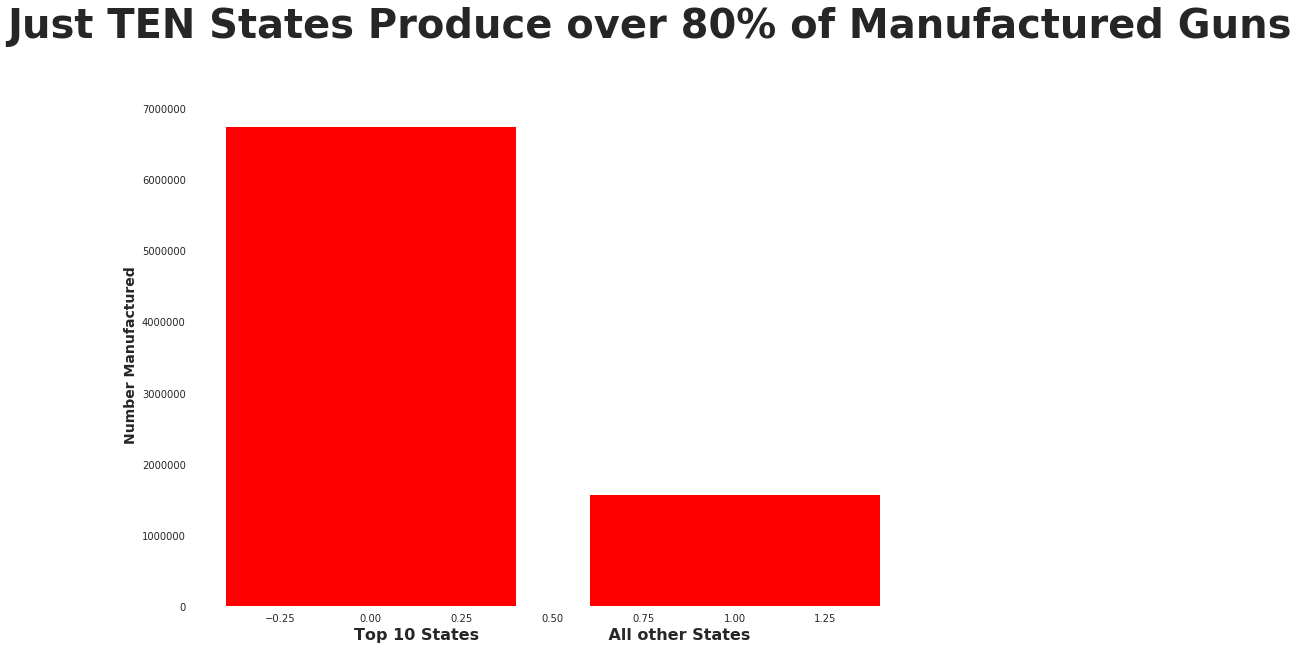

In [98]:
import seaborn as sns
sns.set_style("white")
sns.set_style()

height= [6754233, 1573559]
bars= ('Top 10 States', 'All Others')
y_pos = np.arange(len(bars))
ax = plt.axes([0,0,1,1], frameon=False)

# fig, ax = plt.subplots(figsize=(10,9))
# plt.figure(frameon=False)

plt.bar(y_pos, height,
        color='red')
plt.text(-1,8000000, 'Just TEN States Produce over 80% of Manufactured Guns', size=40, weight='bold')

plt.xlabel('Top 10 States                       All other States',
           size=16, weight='bold')
plt.ylabel('Number Manufactured', size=14, weight='bold');
#plt.title(('Just TEN States Produce over 80% of Manufacture Guns'), size=28, weight='bold');
# plt.spines['top'].set_visible(False)
# plt.spines['right'].set_visible(False);

In [0]:
import folium

# State/gun type exploring

In [58]:
totals

,license_name,rifle_mfg,misc_fa_mfg,pistol_total,shotgun_mfg,rvlrtotl,Manufactured_Total
0,144 TACTICAL LLC,406.0,0.0,0.0,0.0,0.0,406
1,170 TACTICAL INC,3.0,0.0,0.0,0.0,0.0,3
2,1776 ENTERPRISES LLC,6.0,0.0,0.0,0.0,0.0,6
3,20-X INDUSTRIES LLC,1.0,0.0,0.0,0.0,0.0,1
4,2131 ARMS LLC,6.0,0.0,1.0,0.0,0.0,7
...,...,...,...,...,...,...,...
2096,"ZELLER, DAVID W",1.0,0.0,0.0,0.0,0.0,1
2097,ZERMATT ARMS INC,3.0,791.0,0.0,0.0,0.0,794
2098,ZEV TECHNOLOGIES INC,109.0,1956.0,0.0,0.0,0.0,2065
2099,"ZIMMERMAN, DAN B",4.0,0.0,0.0,0.0,0.0,4


In [0]:
state_rifle_totals = df.groupby(df['st'], as_index=False).aggregate({'rifle_mfg': 'sum'})

In [60]:
state_rifle_totals.head()

,st,rifle_mfg
0,AK,69.0
1,AL,3827.0
2,AR,2329.0
3,AZ,6470.0
4,CA,6843.0


In [0]:
state_pistol_totals = df.groupby(df['st'], as_index=False).aggregate({'pistol_total': 'sum'})

In [62]:
state_pistol_totals.head()

,st,pistol_total
0,AK,5.0
1,AL,1160.0
2,AR,54404.0
3,AZ,612063.0
4,CA,28231.0


In [0]:
state_revolver_totals = df.groupby(df['st'], as_index=False).aggregate({'rvlrtotl': 'sum'})

In [64]:
state_revolver_totals.head()

,st,rvlrtotl
0,AK,8.0
1,AL,18.0
2,AR,9.0
3,AZ,26.0
4,CA,34.0


In [65]:
state_shotgun_totals = df.groupby(df['st'], as_index=False).aggregate({'shotgun_mfg': 'sum'})
state_shotgun_totals.head()

,st,shotgun_mfg
0,AK,0.0
1,AL,300.0
2,AR,435.0
3,AZ,5.0
4,CA,40.0


In [66]:
state_misc_totals = df.groupby(df['st'], as_index=False).aggregate({'misc_fa_mfg': 'sum'})
state_misc_totals.head()

,st,misc_fa_mfg
0,AK,40.0
1,AL,275.0
2,AR,646.0
3,AZ,9507.0
4,CA,2094.0


# Totals of each by State

In [67]:
states_and_each_total = pd.merge(state_mfg_totals, state_pistol_totals, how='outer', on='st')
states_and_each_total.head()

,st,Manufactured_Total,pistol_total
0,AK,122,5.0
1,AL,5580,1160.0
2,AR,57823,54404.0
3,AZ,628071,612063.0
4,CA,37242,28231.0


In [68]:
states_and_each_total = pd.merge(states_and_each_total, state_shotgun_totals, how='outer', on='st')
states_and_each_total.head()

,st,Manufactured_Total,pistol_total,shotgun_mfg
0,AK,122,5.0,0.0
1,AL,5580,1160.0,300.0
2,AR,57823,54404.0,435.0
3,AZ,628071,612063.0,5.0
4,CA,37242,28231.0,40.0


In [69]:
states_and_each_total = pd.merge(states_and_each_total, state_misc_totals, how='outer', on='st')
states_and_each_total.head()

,st,Manufactured_Total,pistol_total,shotgun_mfg,misc_fa_mfg
0,AK,122,5.0,0.0,40.0
1,AL,5580,1160.0,300.0,275.0
2,AR,57823,54404.0,435.0,646.0
3,AZ,628071,612063.0,5.0,9507.0
4,CA,37242,28231.0,40.0,2094.0


In [70]:
states_and_each_total = pd.merge(states_and_each_total, state_rifle_totals, how='outer', on='st')
states_and_each_total.head()

,st,Manufactured_Total,pistol_total,shotgun_mfg,misc_fa_mfg,rifle_mfg
0,AK,122,5.0,0.0,40.0,69.0
1,AL,5580,1160.0,300.0,275.0,3827.0
2,AR,57823,54404.0,435.0,646.0,2329.0
3,AZ,628071,612063.0,5.0,9507.0,6470.0
4,CA,37242,28231.0,40.0,2094.0,6843.0


In [71]:
states_and_each_total = pd.merge(states_and_each_total, state_revolver_totals, how='outer', on='st')
states_and_each_total.head()

,st,Manufactured_Total,pistol_total,shotgun_mfg,misc_fa_mfg,rifle_mfg,rvlrtotl
0,AK,122,5.0,0.0,40.0,69.0,8.0
1,AL,5580,1160.0,300.0,275.0,3827.0,18.0
2,AR,57823,54404.0,435.0,646.0,2329.0,9.0
3,AZ,628071,612063.0,5.0,9507.0,6470.0,26.0
4,CA,37242,28231.0,40.0,2094.0,6843.0,34.0


# Plotting by State numbers

In [72]:
state_mfg_totals_ = state_mfg_totals.set_index('st')
state_mfg_totals_ = state_mfg_totals_.sort_values(by='st')
state_mfg_totals_

,Manufactured_Total
st,
AK,122
AL,5580
AR,57823
AZ,628071
CA,37242
CO,970
CT,113352
DE,48
FL,671333


In [0]:
# total_mfg

In [0]:
# totals_mfg.iloc[0]


In [0]:

# height= totals_mfg.iloc[0]
# bars= totals_mfg.columns
# y_pos = np.arange(len(bars))

# plt.bar(y_pos, height, tick_label=['Pistol','Rifle', 'Misc', 'Revolver', 'Shotgun'],
#         color='red')
# plt.xlabel('Type of Gun', size=12, weight='bold')
# plt.ylabel('Number of Manufactured', size=12, weight='bold')
# plt.title('Number of Manufactured by Gun Type', size=16, weight='bold');


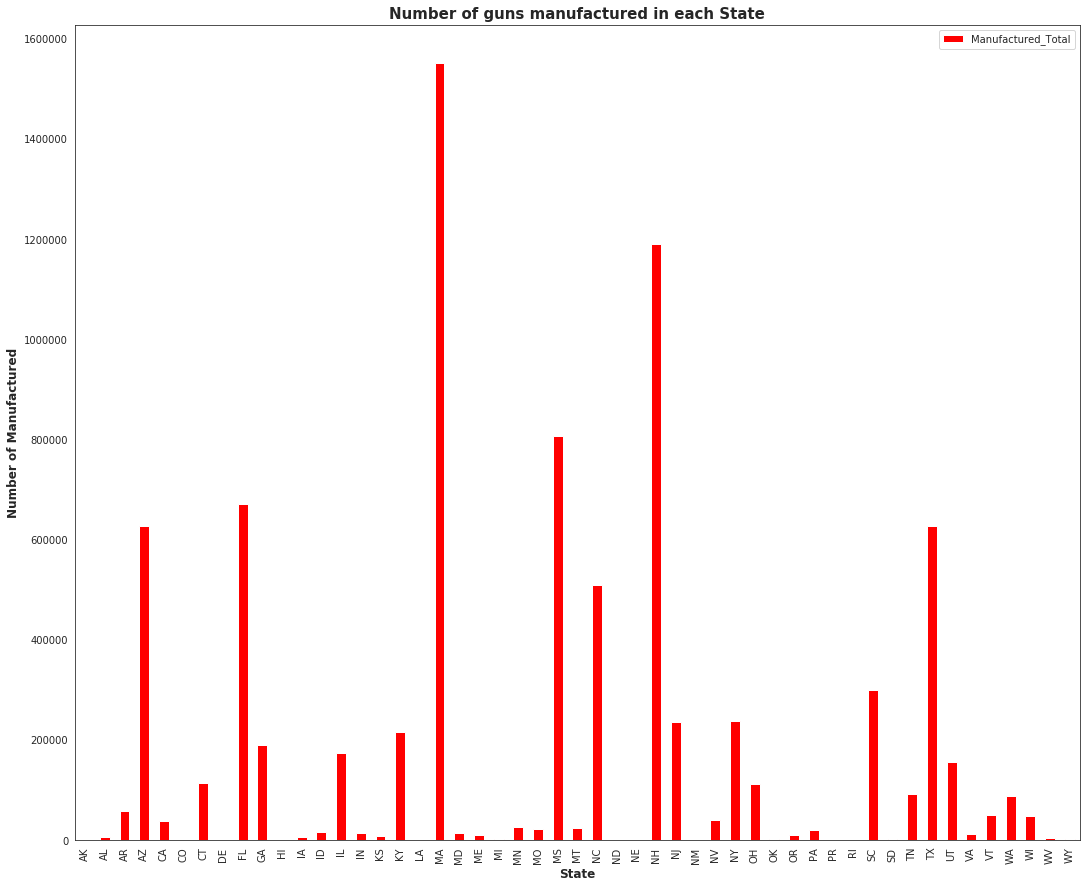

In [100]:
pv = state_mfg_totals_

ax = pv.sort_values('st').plot.bar(figsize=(18,15), color='red')
ax.set_title('Number of guns manufactured in each State', size=15, weight='bold')
plt.ylabel('Number of Manufactured', size=12, weight='bold')
plt.xlabel('State', size=12, weight='bold')

handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='best');

In [75]:
import pandas as pd
import folium
 
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
state_geo = f'{url}/us-states.json'
state_data = states_and_each_total

m = folium.Map(location=[42, -102], zoom_start=4)

tooltip = 'Click me!'

folium.Marker([42.102051, -72.585762], popup=('SMITH & WESSON CORP'),
              icon=folium.Icon(color='lightgray', icon='fas fa-industry', prefix='fa'), 
              tooltip=tooltip).add_to(m)
folium.Marker([43.365210, -72.172350], popup=('Sturm, Ruger & Comp-583,985'),
              icon=folium.Icon(color='lightgray', icon='fas fa-industry', prefix='fa'), 
              tooltip=tooltip).add_to(m)
folium.Marker([34.575671, -112.472412], popup=('Sturm, Ruger & Comp-610,712'),
              icon=folium.Icon(color='lightgray', icon='fas fa-industry', prefix='fa'), 
              tooltip=tooltip).add_to(m)
folium.Marker([34.946058, -89.973659], popup=('Remington Arms-803,343'),
              icon=folium.Icon(color='lightgray', icon='fas fa-industry', prefix='fa'), 
              tooltip=tooltip).add_to(m)
folium.Marker([43.091336, -70.829780], popup=('Sig Sauer Inc.-572,532'),
              icon=folium.Icon(color='lightgray', icon='fas fa-industry', prefix='fa'), 
              tooltip=tooltip).add_to(m)
folium.Marker([28.700296, -100.497039], popup=('Maverick Arms-499,100'),
              icon=folium.Icon(color='lightgray', icon='fas fa-industry', prefix='fa'), 
              tooltip=tooltip).add_to(m)
# folium.raster_layers.ImageOverlay(image='Top_10_States.png',
#                                   bounds=[[48.747139, -116.673031],[37.394430, -95.178207]],
#                                   opacity=1).add_to(m)

folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=state_data,
    columns=['st', 'Manufactured_Total'],
    key_on='feature.id',
    fill_color='OrRd',
    fill_opacity=0.5,
    line_opacity=0.1,
    legend_name='Share of Guns Manufactured by State',
).add_to(m)



folium.LayerControl().add_to(m)
m

# m.save('#292_folium_chloropleth_USA1.html')

#Plot Top Manufactures locations on Map




In [0]:
# top_mfg.license_name

In [77]:
# Springfield, MA = (42.102051, -72.585762)
company = ['SMITH & WESSON CORP']
df.loc[df['license_name'].isin(company)]

,rds_key,license_name,street,city,st,rifle_mfg,exp_misc,exp_pistols,exp_revolvers,rifle_exp,shotgun_exp,misc_fa_mfg,pistol22,pistol25,pistol32,pistol380,pistol9mm,pistol50,pistol_total,rvlr22,rvlr32,rvlr357,rvlr38,rvlr44,rvlr50,rvlrtotl,shotgun_mfg,Export_Total,Manufactured_Total
1479,60401684,SMITH & WESSON CORP,2100 ROOSEVELT AVE,SPRINGFIELD,MA,265356.0,91.0,22440.0,16230.0,11835.0,0.0,1045.0,61997.0,3.0,78.0,113246.0,606732.0,250394.0,1032450.0,7123.0,0.0,43263.0,116823.0,15973.0,24202.0,207384.0,21.0,50596,1506256


In [78]:
#Newport, NH = [43.365210, -72.172350] 583985
#Southport, CT = [41.137806, -73.283306] Not using
#Prescott, AZ = [34.575671, -112.472412] 610712

company = ['STURM, RUGER & COMPANY, INC']
df.loc[df['license_name'].isin(company)]


,rds_key,license_name,street,city,st,rifle_mfg,exp_misc,exp_pistols,exp_revolvers,rifle_exp,shotgun_exp,misc_fa_mfg,pistol22,pistol25,pistol32,pistol380,pistol9mm,pistol50,pistol_total,rvlr22,rvlr32,rvlr357,rvlr38,rvlr44,rvlr50,rvlrtotl,shotgun_mfg,Export_Total,Manufactured_Total
1441,60200735,"STURM, RUGER & COMPANY, INC",529 SUNAPEE ST,NEWPORT,NH,406379.0,37.0,129.0,3992.0,26452.0,0.0,0.0,7336.0,0.0,0.0,0.0,0.0,0.0,7336.0,33859.0,944.0,64077.0,29662.0,23349.0,18365.0,170256.0,14.0,30610,583985
1445,60201484,"STURM, RUGER & COMPANY, INC",411 SUNAPEE ST,NEWPORT,NH,1393.0,0.0,0.0,0.0,0.0,0.0,2.0,28.0,0.0,0.0,0.0,0.0,0.0,28.0,620.0,20.0,622.0,144.0,226.0,170.0,1802.0,2.0,0,3227
1498,60600763,"STURM, RUGER & COMPANY, INC",1 LACEY PL,SOUTHPORT,CT,53.0,0.0,0.0,0.0,1.0,0.0,0.0,13.0,0.0,0.0,6.0,21.0,8.0,48.0,3.0,3.0,10.0,11.0,8.0,1.0,36.0,0.0,1,137
1932,98614472,"STURM, RUGER & COMPANY, INC",200 RUGER RD,PRESCOTT,AZ,12.0,0.0,9135.0,0.0,0.0,0.0,0.0,120033.0,0.0,0.0,281955.0,163865.0,44839.0,610692.0,1.0,0.0,2.0,0.0,1.0,4.0,8.0,0.0,9135,610712


In [79]:

#Southaven, MS 34.946058, -89.973659] 803343


company = ['REMINGTON ARMS COMPANY LLC']
df.loc[df['license_name'].isin(company)]

,rds_key,license_name,street,city,st,rifle_mfg,exp_misc,exp_pistols,exp_revolvers,rifle_exp,shotgun_exp,misc_fa_mfg,pistol22,pistol25,pistol32,pistol380,pistol9mm,pistol50,pistol_total,rvlr22,rvlr32,rvlr357,rvlr38,rvlr44,rvlr50,rvlrtotl,shotgun_mfg,Export_Total,Manufactured_Total
0,1602475,REMINGTON ARMS COMPANY LLC,14 HOEFLER AVE,ILION,NY,0.0,0.0,0.0,0.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26,0
474,16305652,REMINGTON ARMS COMPANY LLC,1816 REMINGTON CIRCLE SW,HUNTSVILLE,AL,2045.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,130.0,674.0,221.0,1025.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,288.0,0,3358
520,16404549,REMINGTON ARMS COMPANY LLC,366 STATELINE RD,SOUTHAVEN,MS,443436.0,0.0,3022.0,0.0,62319.0,18238.0,33377.0,0.0,35.0,0.0,15045.0,25104.0,18266.0,58450.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,268080.0,83579,803343
641,34600878,REMINGTON ARMS COMPANY LLC,1310 INDUSTRY RD,STURGIS,SD,809.0,0.0,0.0,0.0,0.0,0.0,159.0,0.0,0.0,0.0,0.0,2.0,42.0,44.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1012
1541,61602475,REMINGTON ARMS COMPANY LLC,14 HOEFLER AVE,ILION,NY,2223.0,0.0,0.0,0.0,0.0,0.0,400.0,0.0,0.0,0.0,3.0,1.0,58.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1023.0,0,3708


In [80]:
#Newington, NH. [43.091336, -70.829780] 572532
company = ['SIG SAUER INC']
df.loc[df['license_name'].isin(company)]

,rds_key,license_name,street,city,st,rifle_mfg,exp_misc,exp_pistols,exp_revolvers,rifle_exp,shotgun_exp,misc_fa_mfg,pistol22,pistol25,pistol32,pistol380,pistol9mm,pistol50,pistol_total,rvlr22,rvlr32,rvlr357,rvlr38,rvlr44,rvlr50,rvlrtotl,shotgun_mfg,Export_Total,Manufactured_Total
1443,60201128,SIG SAUER INC,12 & 18 INDUSTRIAL DR,EXETER,NH,24.0,0.0,48.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,122.0,12.0,138.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48,162
1447,60201816,SIG SAUER INC,72 PEASE BLVD,NEWINGTON,NH,35896.0,0.0,177366.0,0.0,1758.0,0.0,0.0,2227.0,396.0,495.0,66586.0,368264.0,98668.0,536636.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,179124,572532


In [81]:
#Eagle Pass TX. [28.700296, -100.497039] 499100
company = ['MAVERICK ARMS, INC']
df.loc[df['license_name'].isin(company)]

,rds_key,license_name,street,city,st,rifle_mfg,exp_misc,exp_pistols,exp_revolvers,rifle_exp,shotgun_exp,misc_fa_mfg,pistol22,pistol25,pistol32,pistol380,pistol9mm,pistol50,pistol_total,rvlr22,rvlr32,rvlr357,rvlr38,rvlr44,rvlr50,rvlrtotl,shotgun_mfg,Export_Total,Manufactured_Total
22,7434208,"MAVERICK ARMS, INC",1001 INDUSTRIAL BLVD,EAGLE PASS,TX,0.0,0.0,0.0,0.0,11180.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11180,0
1162,57434208,"MAVERICK ARMS, INC",1001 INDUSTRIAL BLVD,EAGLE PASS,TX,80275.0,0.0,0.0,0.0,0.0,10559.0,115995.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,302830.0,10559,499100


In [82]:
df[df['license_name'].str.contains('MOSSBERG')]

,rds_key,license_name,street,city,st,rifle_mfg,exp_misc,exp_pistols,exp_revolvers,rifle_exp,shotgun_exp,misc_fa_mfg,pistol22,pistol25,pistol32,pistol380,pistol9mm,pistol50,pistol_total,rvlr22,rvlr32,rvlr357,rvlr38,rvlr44,rvlr50,rvlrtotl,shotgun_mfg,Export_Total,Manufactured_Total
1499,60600773,O F MOSSBERG & SONS INC,7 GRASSO AVE,NORTH HAVEN,CT,8296.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,8296


In [83]:
df[df['license_name'].str.contains('GLOCK')]

,rds_key,license_name,street,city,st,rifle_mfg,exp_misc,exp_pistols,exp_revolvers,rifle_exp,shotgun_exp,misc_fa_mfg,pistol22,pistol25,pistol32,pistol380,pistol9mm,pistol50,pistol_total,rvlr22,rvlr32,rvlr357,rvlr38,rvlr44,rvlr50,rvlrtotl,shotgun_mfg,Export_Total,Manufactured_Total
277,15890327,GLOCK INC,6000 HIGHLANDS PKWY,SMYRNA,GA,0.0,0.0,47861.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73646.0,94665.0,7385.0,175696.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47861,175696


# Most Manufactured Guns


In [0]:
tn = {'Rifle_Totoal':[df['rifle_mfg'].sum()],
              'Pistol_Total':[df['pistol_total'].sum()],
              'Revolver_Total':[df['rvlrtotl'].sum()],
              'Shotgun_Total':[df['shotgun_mfg'].sum()],
              'Misc_Total':[df['misc_fa_mfg'].sum()]}
totals_mfg = pd.DataFrame(data=tn)
totals_mfg = totals_mfg.T.sort_values(by=0, ascending=False).T

In [85]:
totals_mfg.sum(1)

0    8327792.0
dtype: float64

In [86]:
tz = {'Rifle_Exports':[df['rifle_exp'].sum()],
              'Pistol_Exports':[df['exp_pistols'].sum()],
              'Revolver_Exports':[df['exp_revolvers'].sum()],
              'Shotgun_Exports':[df['shotgun_exp'].sum()],
              'Misc_Exports':[df['exp_misc'].sum()]}
totals_exp = pd.DataFrame(data=tz)
totals_exp

,Rifle_Exports,Pistol_Exports,Revolver_Exports,Shotgun_Exports,Misc_Exports
0,158871.0,275424.0,21676.0,29997.0,2332.0


In [87]:
totals_exp.sum(1)

0    488300.0
dtype: float64

In [88]:
(df.Manufactured_Total.sum()) - (df.Export_Total.sum())

7839492

In [89]:
ld = {'Total_Pistol':[df['pistol_total'].sum()],
              'Pistol_22_Total':[df['pistol22'].sum()],
              'Pistol_25_Total':[df['pistol25'].sum()],
              'Pistol_32_Total':[df['pistol32'].sum()],
              'Pistol_380_Total':[df['pistol380'].sum()],
                'Pistol_9mm_Total':[df['pistol9mm'].sum()],
                'Pistol_50_Total':[df['pistol50'].sum()]}
pistol_cal_totals = pd.DataFrame(data=ld)
pistol_cal_totals = pistol_cal_totals.T.sort_values(by=0, ascending=False).T
pistol_cal_totals

,Total_Pistol,Pistol_9mm_Total,Pistol_380_Total,Pistol_50_Total,Pistol_22_Total,Pistol_25_Total,Pistol_32_Total
0,3691010.0,1756618.0,848425.0,657971.0,408705.0,11135.0,8152.0


In [0]:
fn = {'Revolver_Total':[df['rvlrtotl'].sum()],
              'Revolver_22_Total':[df['rvlr22'].sum()],
              'Revolver_25_Total':[df['rvlr32'].sum()],
              'Revolver_357_Total':[df['rvlr357'].sum()],
              'Revolver_38_Total':[df['rvlr38'].sum()],
                'Revolver_44_Total':[df['rvlr44'].sum()],
                'Revolver_50_Total':[df['rvlr50'].sum()]}
revolver_cal_totals = pd.DataFrame(data=fn)
revolver_cal_totals = revolver_cal_totals.T.sort_values(by=0, ascending=False).T

In [91]:
totals_mfg.iloc[0,:]

Pistol_Total      3691010.0
Rifle_Totoal      2504092.0
Misc_Total         758634.0
Revolver_Total     720917.0
Shotgun_Total      653139.0
Name: 0, dtype: float64

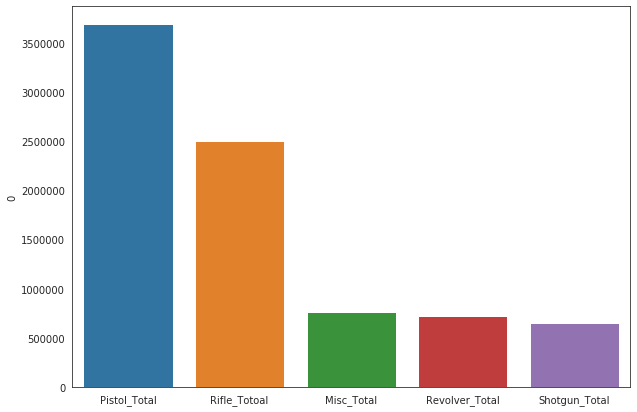

In [92]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl 
import seaborn as sns
%matplotlib inline

sns.set_style("white")
sns.set_context({"figure.figsize": (10, 7)})

sns.barplot(x=totals_mfg.columns, y=totals_mfg.iloc[0,:]);


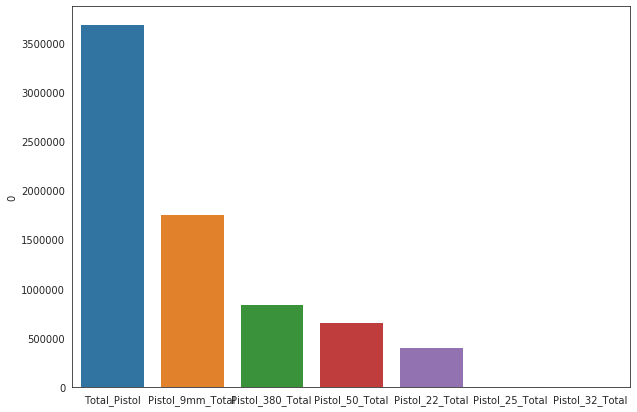

In [93]:
sns.set_style("white")
sns.set_context({"figure.figsize": (10, 7)})

sns.barplot(x=pistol_cal_totals.columns, y=pistol_cal_totals.iloc[0,:]);

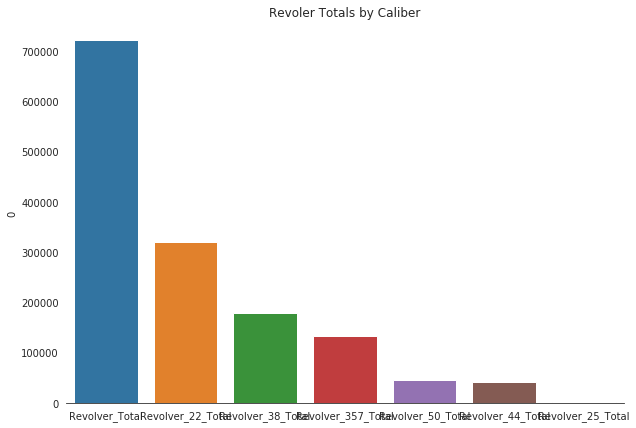

In [94]:
%matplotlib inline

sns.set_style("white")
sns.set_context({"figure.figsize": (10, 7)})

sns.barplot(x=revolver_cal_totals.columns, y=revolver_cal_totals.iloc[0,:])

# topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
# bottombar = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
# l = plt.legend([bottombar, topbar], ['Bottom Bar', 'Top Bar'], loc=1, ncol = 2, prop={'size':16})
plt.title('Revoler Totals by Caliber')
# l.draw_frame(False)

sns.despine(left=True);

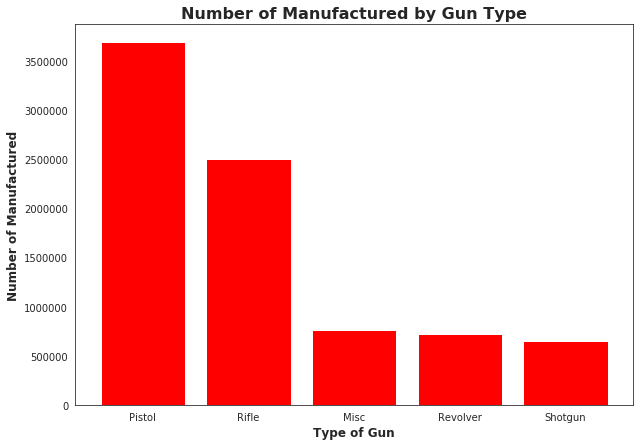

In [104]:
height= totals_mfg.iloc[0]
bars= totals_mfg.columns
y_pos = np.arange(len(bars))

plt.bar(y_pos, height, tick_label=['Pistol','Rifle', 'Misc', 'Revolver', 'Shotgun'],
        color='red')
plt.xlabel('Type of Gun', size=12, weight='bold')
plt.ylabel('Number of Manufactured', size=12, weight='bold')
plt.title('Number of Manufactured by Gun Type', size=16, weight='bold');

In [96]:
states_and_each_total.sort_values(by='Manufactured_Total')

,st,Manufactured_Total,pistol_total,shotgun_mfg,misc_fa_mfg,rifle_mfg,rvlrtotl
38,PR,1,0.0,0.0,0.0,1.0,0.0
10,HI,3,0.0,0.0,0.0,3.0,0.0
27,ND,4,0.0,0.0,0.0,3.0,1.0
39,RI,6,1.0,0.0,3.0,2.0,0.0
7,DE,48,0.0,0.0,0.0,48.0,0.0
0,AK,122,5.0,0.0,40.0,69.0,8.0
31,NM,237,11.0,20.0,46.0,160.0,0.0
17,LA,383,56.0,0.0,62.0,265.0,0.0
5,CO,970,122.0,1.0,64.0,783.0,0.0
28,NE,1029,80.0,3.0,792.0,152.0,2.0
